# **[ 머신러닝 프로젝트 1 : 붓꽃 분류 ]**

**1. 목적**

* 붓꽃을 3가지의 품종(Setosa, Versicolour, Virginica) 중에서 하나의 품종으로 분류하는 다중 분류 문제이다.
<br><br>

**2. 데이터 탐색 및 분석**

* 데이터 로드: scikit-learn 라이브러리의 datasets 모듈에서 붓꽃(load_iris) 데이터 셋을 불러온다.
* 데이터 구조 확인: 데이터셋의 독립 변수(feature)와 목표 변수(target)를 확인한다.
* 기초 통계 분석: 각 특성의 평균, 분산, 최대값, 최소값 등을 확인한다.
* 클래스 분포 확인: 각 붓꽃 품종의 데이터 개수를 확인한다.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
# Check the keys ​​of the loaded Iris dataset.
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Check the information ​using 'DESCR' key ​of the loaded Iris dataset.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
# Check the features's name ​using 'feature_names' key ​of the loaded Iris dataset.
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Check the labels's name ​using 'target_names' key ​of the loaded Iris dataset.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# To make data easier to handle, convert it to a dataframe using the Pandas library.
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target

In [8]:
# Rename the columns header name of the dataframe.
iris_df.columns = [col.replace(' ', '_').title() for col in iris_df.columns]

In [9]:
# Check the size for the Iris dataset.
iris_df.shape

(150, 5)

In [10]:
# Check out part of the contents for the Iris dataset.
iris_df.head()

,Sepal_Length_(Cm),Sepal_Width_(Cm),Petal_Length_(Cm),Petal_Width_(Cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Summarizes statistical information(min, max, mean, std ...) about Iris dataset.
iris_df.describe()

,Sepal_Length_(Cm),Sepal_Width_(Cm),Petal_Length_(Cm),Petal_Width_(Cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Explore the data.
# Display basic information of the Iris dataset.
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal_Length_(Cm)  150 non-null    float64
 1   Sepal_Width_(Cm)   150 non-null    float64
 2   Petal_Length_(Cm)  150 non-null    float64
 3   Petal_Width_(Cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
# Check for missing values.
# Calculates the total number of missing values ​​in each column.
iris_df.isnull().sum()

,0
Sepal_Length_(Cm),0
Sepal_Width_(Cm),0
Petal_Length_(Cm),0
Petal_Width_(Cm),0
Species,0


In [14]:
# Check for duplicate data.
iris_df.duplicated().sum()

1

In [15]:
iris_df.loc[iris_df.duplicated()]

,Sepal_Length_(Cm),Sepal_Width_(Cm),Petal_Length_(Cm),Petal_Width_(Cm),Species
142,5.8,2.7,5.1,1.9,2


In [16]:
iris_df.loc[(iris_df['Sepal_Length_(Cm)'] == 5.8) & (iris_df['Sepal_Width_(Cm)'] == 2.7) & (iris_df['Petal_Length_(Cm)'] == 5.1) & (iris_df['Petal_Width_(Cm)'] == 1.9), :]

,Sepal_Length_(Cm),Sepal_Width_(Cm),Petal_Length_(Cm),Petal_Width_(Cm),Species
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [17]:
# Eliminate duplicate data.
iris_df.drop_duplicates(inplace=True)

In [18]:
# Analyze correlations by outputting a correlation coefficient matrix.
iris_df.corr()

,Sepal_Length_(Cm),Sepal_Width_(Cm),Petal_Length_(Cm),Petal_Width_(Cm),Species
Sepal_Length_(Cm),1.000000,-0.118129,0.873738,0.820620,0.786971
Sepal_Width_(Cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
Petal_Length_(Cm),0.873738,-0.426028,1.000000,0.962772,0.949402
Petal_Width_(Cm),0.820620,-0.362894,0.962772,1.000000,0.956514
Species,0.786971,-0.422987,0.949402,0.956514,1.000000


**3. 데이터 시각화**

* 히스토그램: 각 특성의 분포를 시각화하여 데이터의 범위와 분포를 확인한다.
* 산점도: 피처 간의 관계와 클래스 간의 차이를 확인한다.
* pairplot: 데이터의 특성을 종합적으로 시각화한다.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

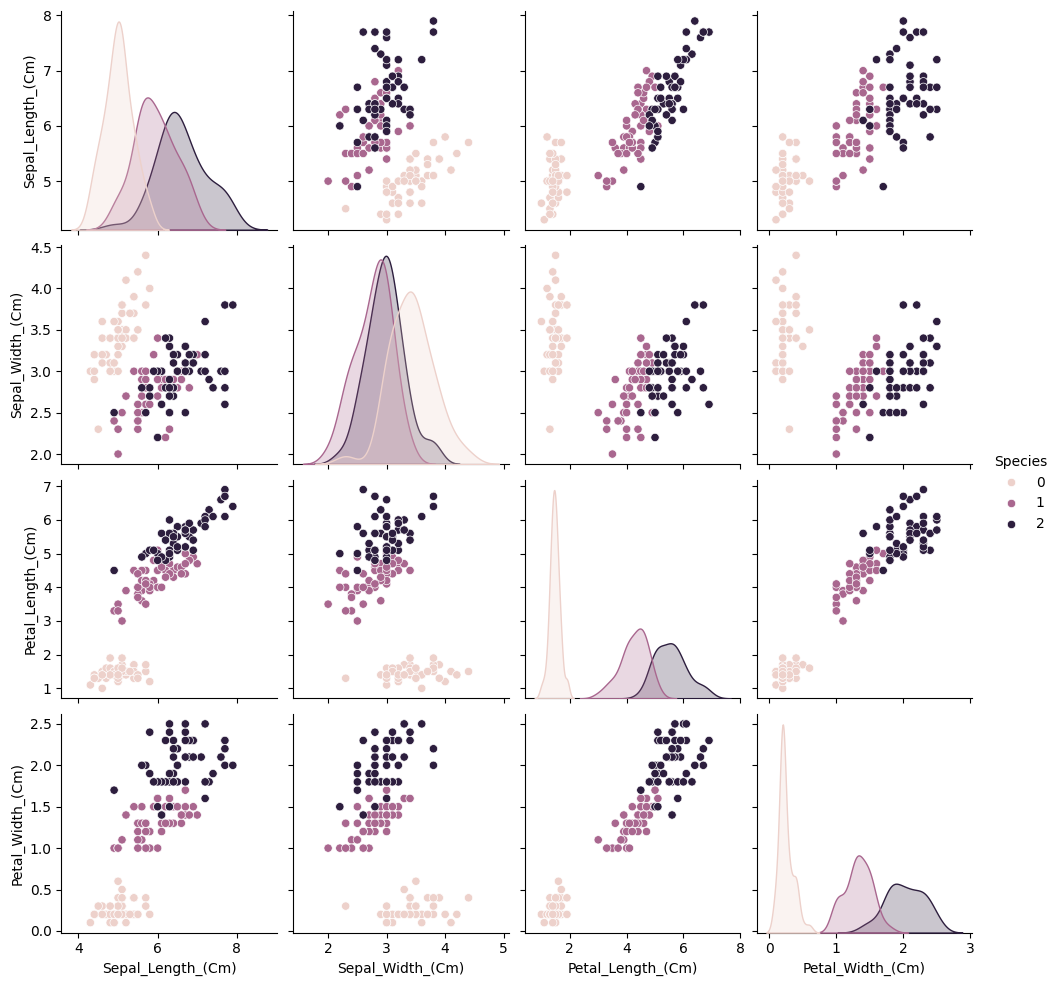

In [20]:
sns.pairplot(iris_df, hue='Species', diag_kind='kde')
plt.show()

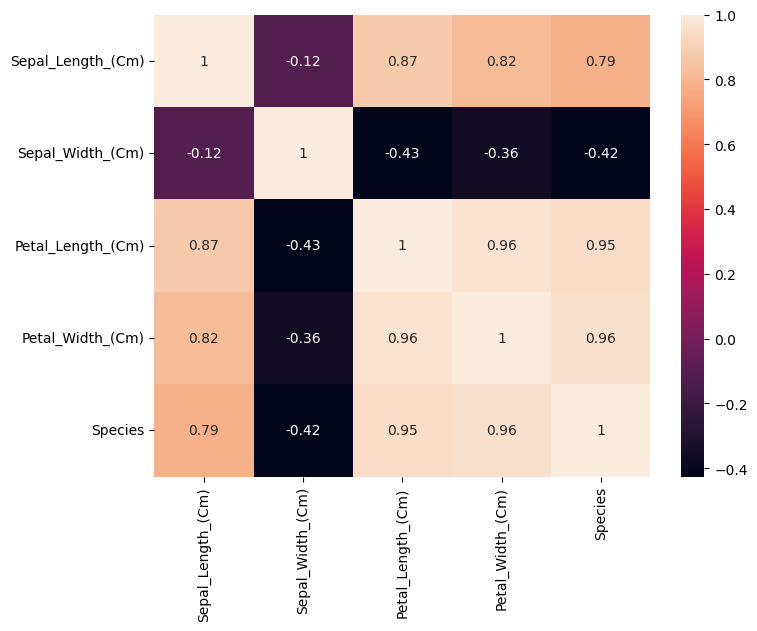

In [22]:
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), cbar=True, annot=True)
plt.show()

In [24]:
# Check the number of samples per label of the target data.
iris_df['Species'].value_counts()

,count
Species,
0,50
1,50
2,49


**4. 데이터 전처리**

* 데이터 분할: 데이터를 모델 학습에 사용할 훈련용과 모델 성능을 평가하는데 사용할 테스트용으로 분리한다.
* 데이터 스케일링(Optional): 일부 알고리즘은 특성 스케일에 민감하므로 정규화 및 표준화를 수행할 수 있다.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (일부 모델의 성능 향상을 위해)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**5. 모델 학습 및 평가**

* 모델 선택: KNN, 로지스틱 회귀, SVM, 랜덤 포레스트 등 여러 분류 모델을 사용할 수 있다.
* 모델 학습: 훈련 데이터를 사용하여 모델을 학습한다.
* 모델 성능 평가: 정확도, 정밀도, 재현율, F1 스코어 등을 사용하여 모델의 성능을 평가한다.

**6. 결과 해석 및 시각화**
* Confusion Matrix: 예측 결과를 시각화하여 잘못 분류된 사례를 확인한다.
* Feature Importance: 모델이 사용하는 피처의 중요도를 분석한다.(적용 가능한 모델에 한함)

--- KNN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




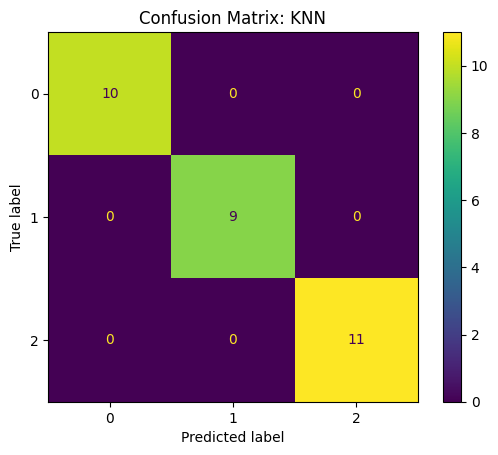

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




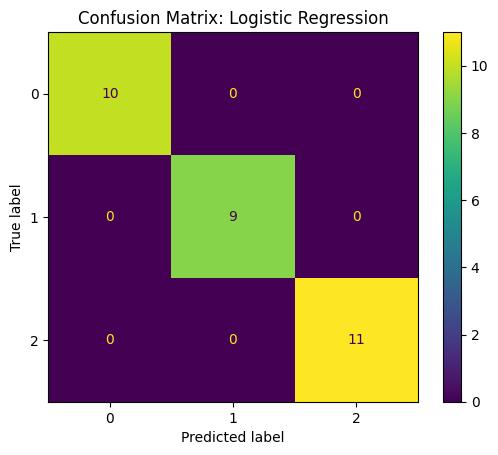

--- SVM ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667




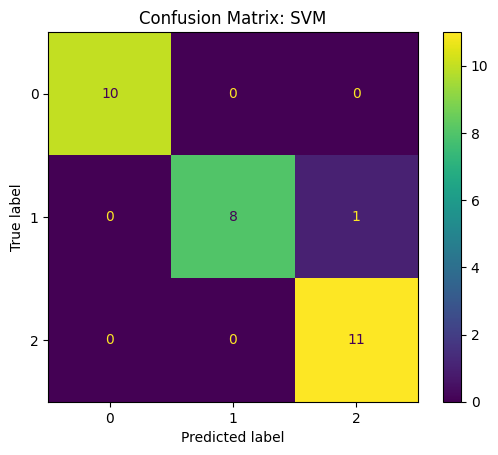

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




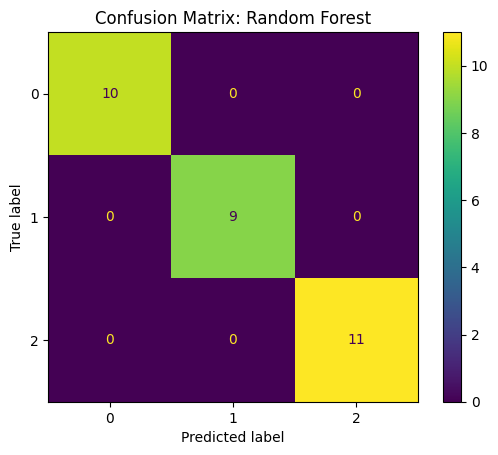

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# 모델 리스트
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# 4. 각 모델 학습 및 평가
for name, model in models.items():
    print(f"--- {name} ---")
    # SVM 제외한 모델은 스케일링 사용하지 않음
    if name in ["KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

    # Confusion Matrix Display
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled if name in ["KNN", "SVM"] else X_test, y_test)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

**7. 결론 및 개선 방안**

* 모델 비교: 여러 분류 모델의 성능을 비교하여 최적의 모델을 선택한다.
<br><br>
* 모델 개선: 하이퍼파라미터 튜닝, 더 많은 데이터 수집, 피처 엔지니어링 등 성능 향상 방법을 모색한다.

    1. 하이퍼파라미터 튜닝

        \+ KNN(K-Nearest Neibors)
            - n_neighbors: 몇 개의 이웃을 고려할지 설정한다.
        \+ 로지스틱 회귀
            - C: 규제 강도를 조절한다.(작을수록 규제를 강화한다.)
        \+ SVM(Support Vector Machine)
            - C: 마진과 오류 허용 간의 균형을 조절한다.
            - kernel: linear(선형) 또는 rbf(비선형)로 설정한다.
        \+ 랜덤 포레스트(Random Forest)
            - n_estimators: 트리의 개수
            - max_depth: 트리의 최대 깊이

    2. 개선 사항
    
        \+ 각 모델의 최적 하이퍼파라미터를 찾은 후 정확도와 기타 지표를 비교한다.

        \+ GridSearchCV는 각 하이퍼파라미터 조합을 교차 검증을 통해 테스트하므로 튜닝 결과가 신뢰할 만하다.

--- KNN ---
Best Params: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




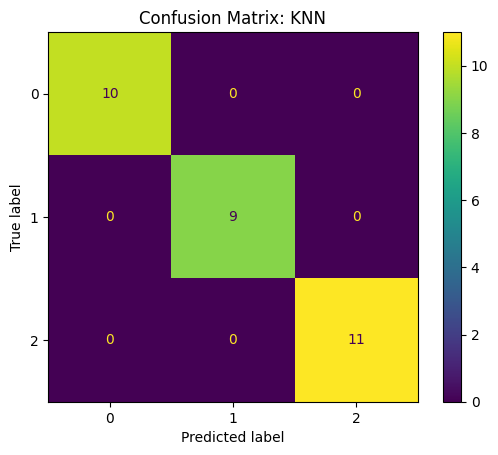

--- Logistic Regression ---
Best Params: {'C': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




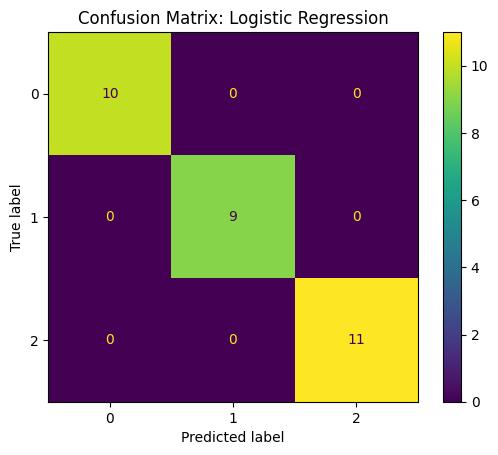

--- SVM ---
Best Params: {'C': 10, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667




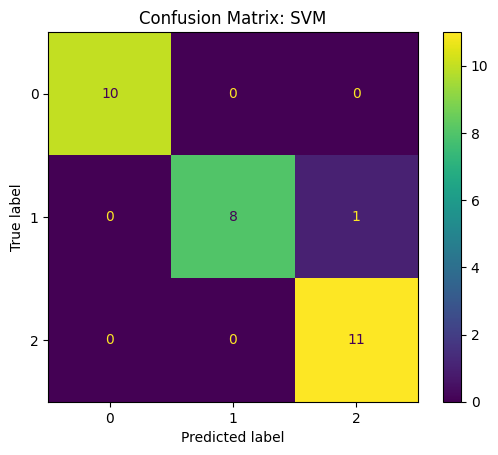

--- Random Forest ---
Best Params: {'max_depth': 3, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0




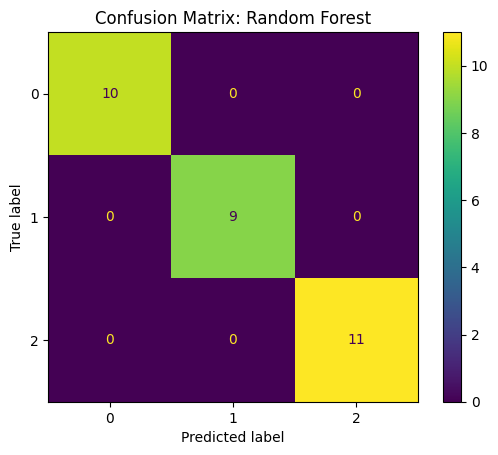

In [27]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝 설정
tuned_params = {
    "KNN": {"n_neighbors": [3, 5, 7, 9]},
    "Logistic Regression": {"C": [0.1, 1, 10, 100]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [3, 5, 10, None]}
}

# 모델 리스트
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}

best_models = {}

# 모델별 하이퍼파라미터 튜닝 및 평가
for name, model in models.items():
    grid = GridSearchCV(model, tuned_params[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled if name in ["KNN", "SVM"] else X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    # 예측 및 성능 평가
    y_pred = best_model.predict(X_test_scaled if name in ["KNN", "SVM"] else X_test)
    print(f"--- {name} ---")
    print(f"Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

    # Confusion Matrix Display
    ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled if name in ["KNN", "SVM"] else X_test, y_test)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()